<a href="https://colab.research.google.com/github/Mukeshburdak/Codec_Tech_Intern_Predictive_maintenance_for_manufacturing/blob/main/Predictive_maintenance_for_manufacturing_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Important library import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OutputCodeClassifier
from sklearn.metrics import f1_score,fbeta_score,matthews_corrcoef,log_loss,confusion_matrix,classification_report ,make_scorer,balanced_accuracy_score, pair_confusion_matrix
from sklearn.metrics import accuracy_score,roc_curve,auc,recall_score,roc_auc_score,average_precision_score,precision_score,precision_recall_curve
from sklearn.model_selection import GridSearchCV ,learning_curve
from lightgbm import LGBMClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.preprocessing import  (OneHotEncoder , PowerTransformer , StandardScaler)

Uploding Data Set

In [ ]:
df = pd.read_csv('predictive_maintenance.csv')

Data Preprocessing

In [ ]:
df['Failure Type'].value_counts()

,count
Failure Type,
No Failure,9652
Heat Dissipation Failure,112
Power Failure,95
Overstrain Failure,78
Tool Wear Failure,45
Random Failures,18


In [ ]:
df.drop(['Product ID','UDI','Target','Type'],axis = 1,inplace = True)

In [ ]:
df

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Failure Type
0,298.1,308.6,1551,42.8,0,No Failure
1,298.2,308.7,1408,46.3,3,No Failure
2,298.1,308.5,1498,49.4,5,No Failure
3,298.2,308.6,1433,39.5,7,No Failure
4,298.2,308.7,1408,40.0,9,No Failure
...,...,...,...,...,...,...
9995,298.8,308.4,1604,29.5,14,No Failure
9996,298.9,308.4,1632,31.8,17,No Failure
9997,299.0,308.6,1645,33.4,22,No Failure
9998,299.0,308.7,1408,48.5,25,No Failure


In [ ]:
df['Failure Type'] = df['Failure Type'].map({'No Failure':0,'Heat Dissipation Failure':1,'Power Failure':2,'Overstrain Failure':3,'Random Failures':4})

Data Visualization

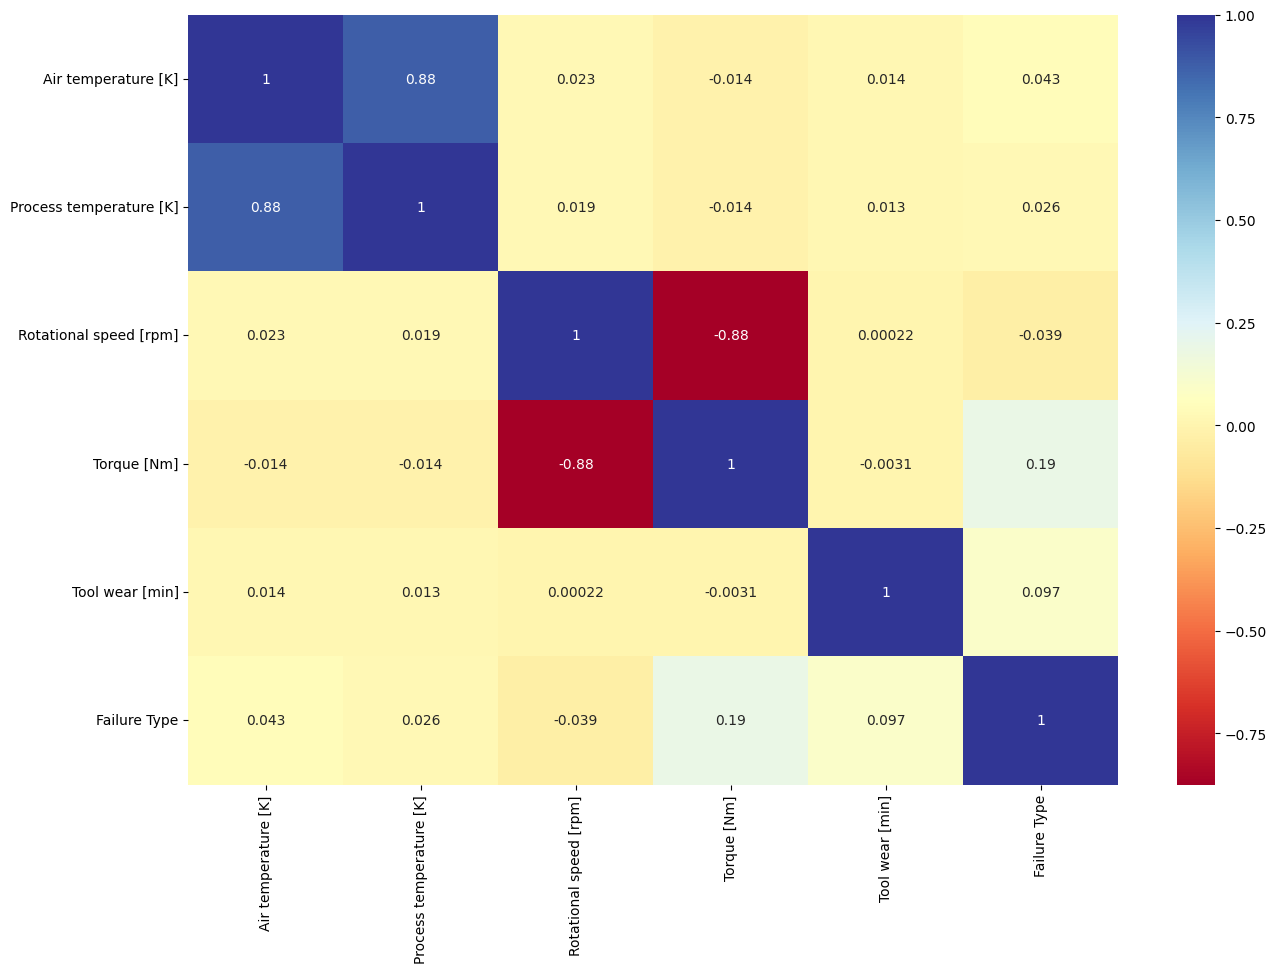

In [ ]:
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(),annot = True , cmap = "RdYlBu")
plt.draw()

In [ ]:
df.isnull().values.any()

np.False_

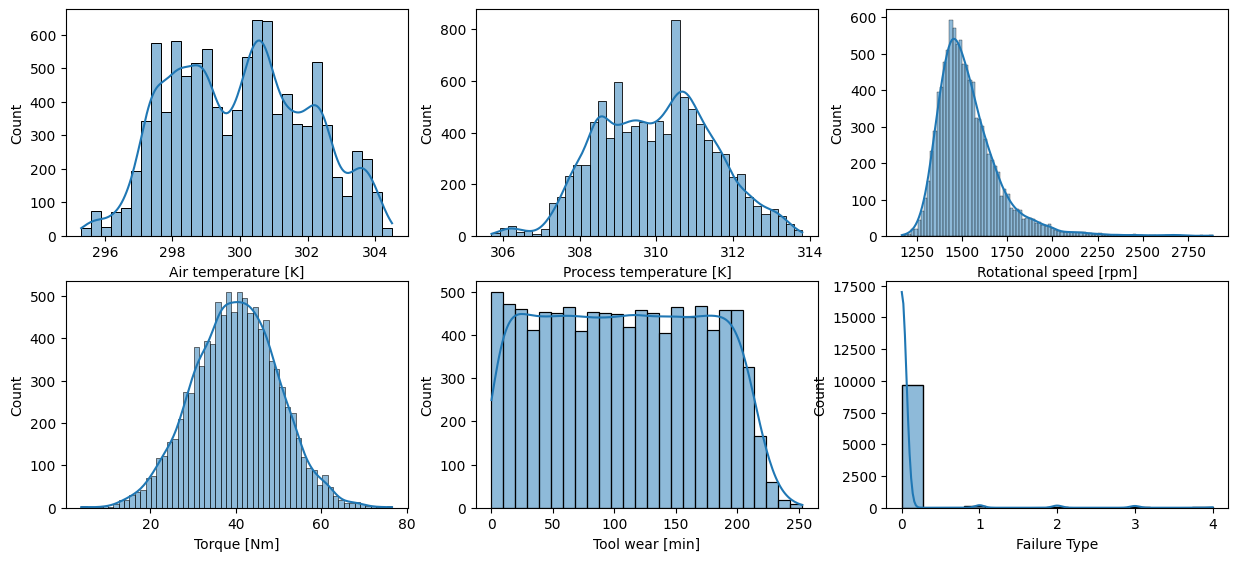

In [ ]:
plt.figure(figsize = (15,10))
for i,col in enumerate(df.columns,1):
    plt.subplot(3,3,i)
    sns.histplot(df[col],kde = True)

array([[<Axes: title={'center': 'UDI'}>,
        <Axes: title={'center': 'Air temperature [K]'}>,
        <Axes: title={'center': 'Process temperature [K]'}>],
       [<Axes: title={'center': 'Rotational speed [rpm]'}>,
        <Axes: title={'center': 'Torque [Nm]'}>,
        <Axes: title={'center': 'Tool wear [min]'}>],
       [<Axes: title={'center': 'Target'}>, <Axes: >, <Axes: >]],
      dtype=object)

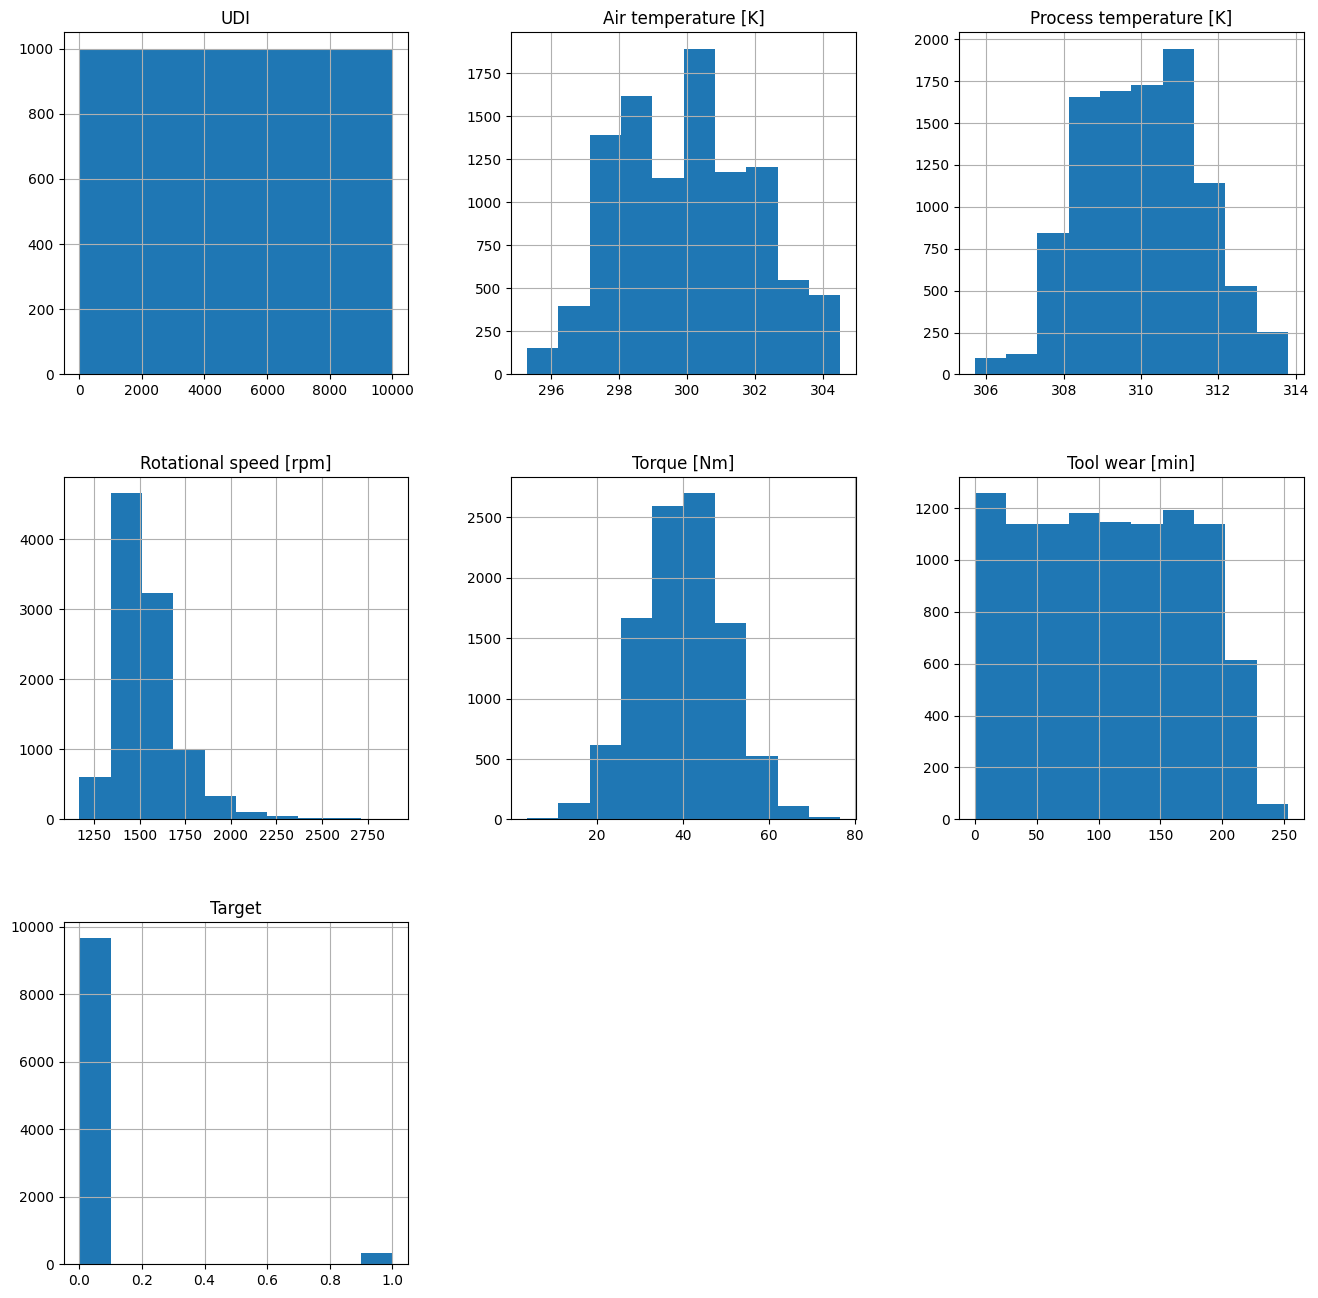

In [ ]:
df.hist(figsize=(16,16))

In [ ]:
df.describe()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Failure Type
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,9955.000000
mean,300.004930,310.005560,1538.776100,39.986910,107.951000,0.061075
std,2.000259,1.483734,179.284096,9.968934,63.654147,0.380991
min,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,304.500000,313.800000,2886.000000,76.600000,253.000000,4.000000


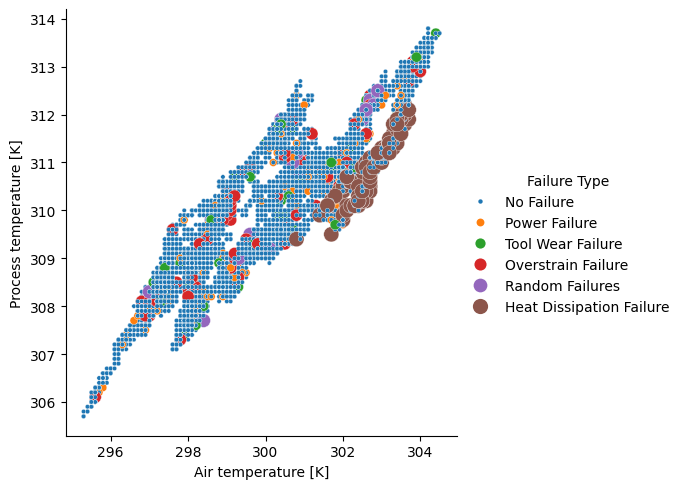

In [ ]:
relp_=sns.relplot(x = 'Air temperature [K]',y = 'Process temperature [K]',data = df,hue = 'Failure Type',size = 'Failure Type',sizes =(120,10))

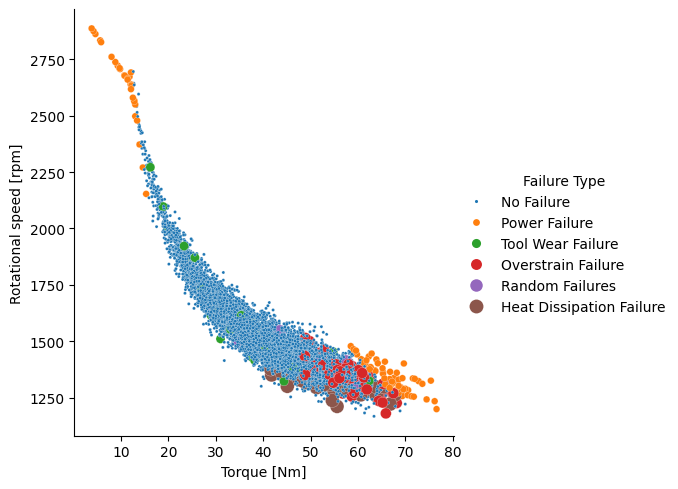

In [ ]:
__ = sns.relplot(x = 'Torque [Nm]',y = 'Rotational speed [rpm]',data = df,hue = 'Failure Type',size = 'Failure Type',sizes = (100,5))

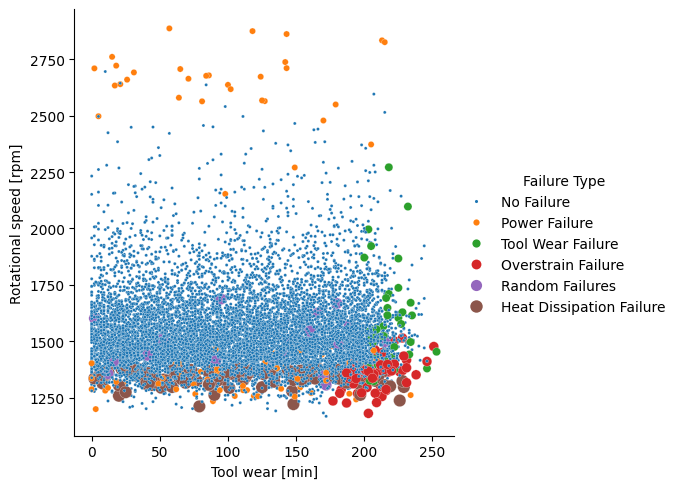

In [ ]:
__ = sns.relplot(x = "Tool wear [min]",
                y = "Rotational speed [rpm]",
                hue = "Failure Type",
                size= "Failure Type",
                sizes = (80,5),
                data = df)

In [ ]:
col_name = df.columns.to_list()

In [ ]:
predictive_columns = col_name[0:5]
x = df[predictive_columns]
y = df["Failure Type"]

In [ ]:
from imblearn.combine import SMOTETomek
smote = SMOTETomek(random_state = 42)
x1_res ,y1_res = smote.fit_resample(x,y)

In [ ]:
x1_res.shape

(57862, 5)

In [ ]:
df_x = pd.DataFrame(x1_res)

In [ ]:
df_y = pd.DataFrame(y1_res)

In [ ]:
df1 = pd.concat([df_x,df_y],axis = 1)

In [ ]:
df1['Failure Type'].value_counts()

,count
Failure Type,
Overstrain Failure,9652
Heat Dissipation Failure,9648
Tool Wear Failure,9647
Power Failure,9645
Random Failures,9643
No Failure,9627


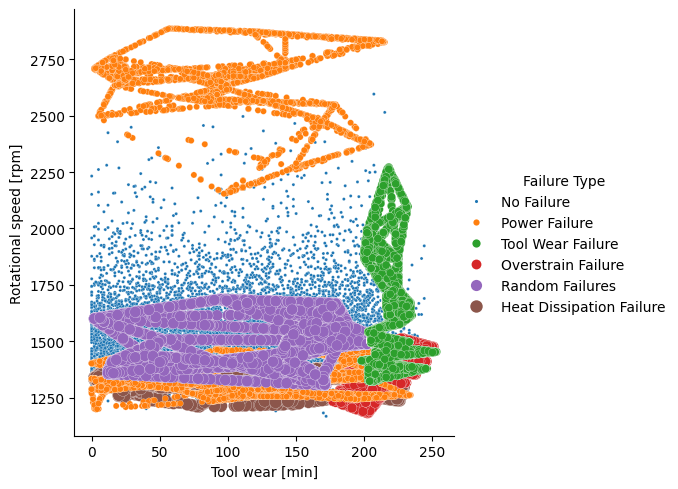

In [ ]:
__ = sns.relplot(x = "Tool wear [min]",
                 y = "Rotational speed [rpm]",
                 hue = "Failure Type",
                 size = "Failure Type",
                 sizes = (80,5),
                 data = df1)

In [ ]:
col_name = df.columns.to_list()

In [ ]:
predictive_columns = col_name[0:5]
x = df1[predictive_columns]
y = df1["Failure Type"]

Traning and Testing Data

In [ ]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits =5, random_state =None)
for train_index,test_index in skf.split(x,y):
  x1_train,x1_test = x.iloc[train_index],x.iloc[test_index]
  y1_train,y1_test = y.iloc[train_index],y.iloc[test_index]
  train_0,train_1 = len(y1_train[y1_train == 0]), len(y1_train[y1_train == 1])
  test_0,test_1 = len(y1_test[y1_test == 0]), len(y1_test[y1_test == 1])
  print('train: 0 = %d,1 = %d , Test: 0 = %d, 1= %d ' % (train_0, train_1,test_0,test_1))

train: 0 = 0,1 = 0 , Test: 0 = 0, 1= 0 
train: 0 = 0,1 = 0 , Test: 0 = 0, 1= 0 
train: 0 = 0,1 = 0 , Test: 0 = 0, 1= 0 
train: 0 = 0,1 = 0 , Test: 0 = 0, 1= 0 
train: 0 = 0,1 = 0 , Test: 0 = 0, 1= 0 


In [ ]:
#create train/test sets
x_train ,x_test ,y_train ,y_test = train_test_split(
    x,y , random_state = 40,test_size = 0.33,stratify =y
)

In [ ]:
#Bulid categorical preprocessor
categorical_cols = x.select_dtypes(include = 'object').columns.to_list()
categorical_pipe = make_pipeline(OneHotEncoder(handle_unknown = 'ignore'))

#Bulid numeric processor
to_log = ['Rotational speed [rpm]',"Tool wear [min]"]
to_scale =["Air temperature [K]",'Process temperature [K]',"Torque [Nm]"]
numeric_pipe_1 = make_pipeline(PowerTransformer())
numeric_pipe_2 = make_pipeline(StandardScaler())

#Full processor
full = ColumnTransformer(
    transformers = [
        ("categorical",categorical_pipe,categorical_cols),
        ("power_transform",numeric_pipe_1,to_log),
        ("standardization",numeric_pipe_2,to_scale)
    ]
)

Apply RandomForestClassifier

In [ ]:
rfc = OutputCodeClassifier(RandomForestClassifier(),code_size=6,random_state=40)

In [ ]:
# Final pipeline Combined with RandomForest
pipeline = Pipeline(
    steps = [("preprocess", full),("base",rfc,),])

In [ ]:
model_rfc = pipeline.fit(x_train,y_train)
y_pred_rfc = model_rfc.predict(x_test)

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

                          precision    recall  f1-score   support

Heat Dissipation Failure       1.00      1.00      1.00      3184
              No Failure       1.00      0.96      0.98      3177
      Overstrain Failure       0.99      1.00      1.00      3185
           Power Failure       1.00      1.00      1.00      3183
         Random Failures       0.99      1.00      0.99      3182
       Tool Wear Failure       0.98      1.00      0.99      3184

                accuracy                           0.99     19095
               macro avg       0.99      0.99      0.99     19095
            weighted avg       0.99      0.99      0.99     19095



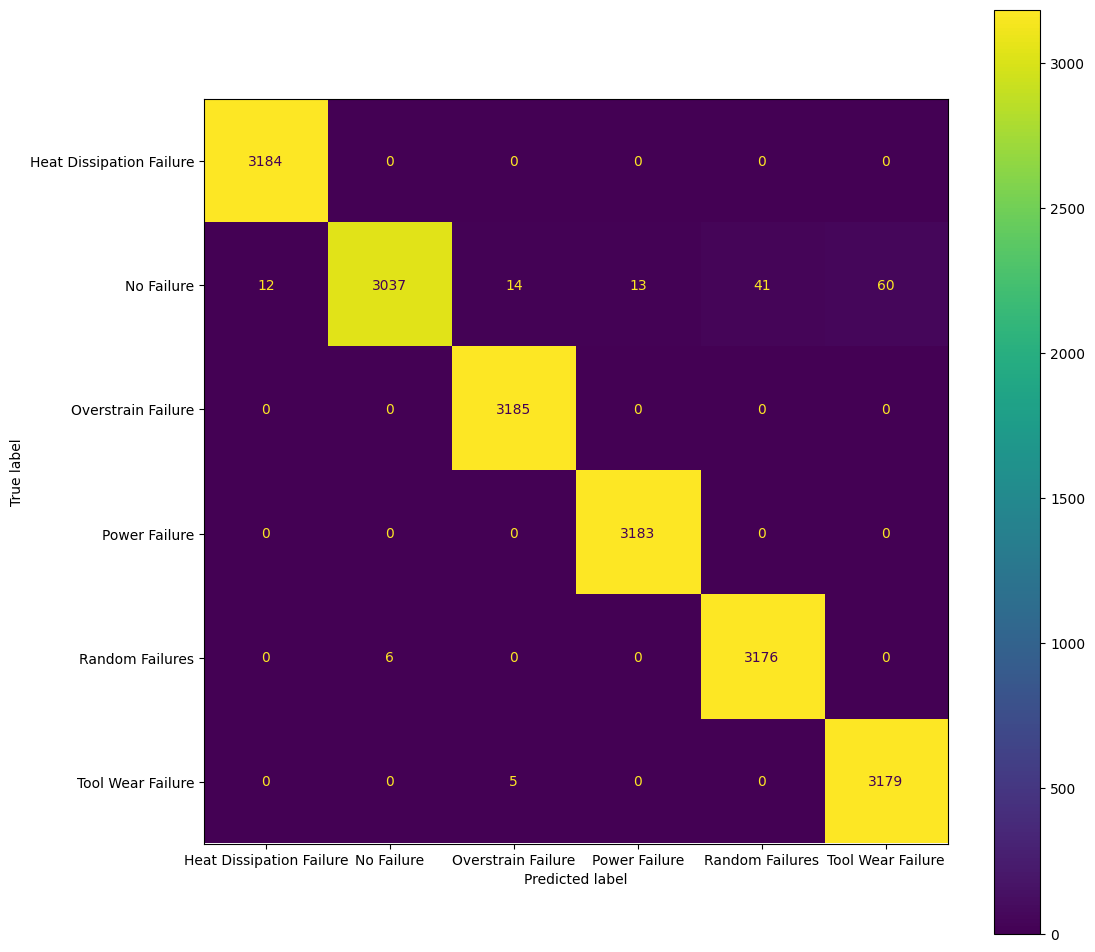

In [ ]:
#plot the confusion matrix
fig , ax = plt.subplots(figsize =(12,12))
print(classification_report(y_test , y_pred_rfc))
#create the matrix
cm = confusion_matrix(y_test,y_pred_rfc)
cmp = ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = pipeline.classes_)
cmp.plot(ax = ax)
plt.show()


In [ ]:
print(classification_report(y_test,y_pred_rfc))

                          precision    recall  f1-score   support

Heat Dissipation Failure       1.00      1.00      1.00      3184
              No Failure       1.00      0.96      0.98      3177
      Overstrain Failure       0.99      1.00      1.00      3185
           Power Failure       1.00      1.00      1.00      3183
         Random Failures       0.99      1.00      0.99      3182
       Tool Wear Failure       0.98      1.00      0.99      3184

                accuracy                           0.99     19095
               macro avg       0.99      0.99      0.99     19095
            weighted avg       0.99      0.99      0.99     19095



In [ ]:
print("Accuracy Score : %.4f" %(accuracy_score(y_test,y_pred_rfc)))
print("Matthews correlation coefficient : %.4f" %(matthews_corrcoef(y_test,y_pred_rfc)))

Accuracy Score : 0.9921
Matthews correlation coefficient : 0.9905


LGBMClassifier

In [ ]:
lgbm = OutputCodeClassifier(LGBMClassifier(),code_size=6,random_state=42)

In [ ]:
#Final pipeline combined with RandomForest
pipeline_lgbm = Pipeline(
    steps =[
        ("preprocess",full),
        ("base",lgbm),])

In [ ]:
model_lgbm = pipeline_lgbm.fit(x_train,y_train)
y_pred_lgbm = model_lgbm.predict(x_test)

                          precision    recall  f1-score   support

Heat Dissipation Failure       1.00      1.00      1.00      3184
              No Failure       1.00      0.96      0.98      3177
      Overstrain Failure       0.99      1.00      1.00      3185
           Power Failure       1.00      1.00      1.00      3183
         Random Failures       0.99      1.00      0.99      3182
       Tool Wear Failure       0.98      1.00      0.99      3184

                accuracy                           0.99     19095
               macro avg       0.99      0.99      0.99     19095
            weighted avg       0.99      0.99      0.99     19095



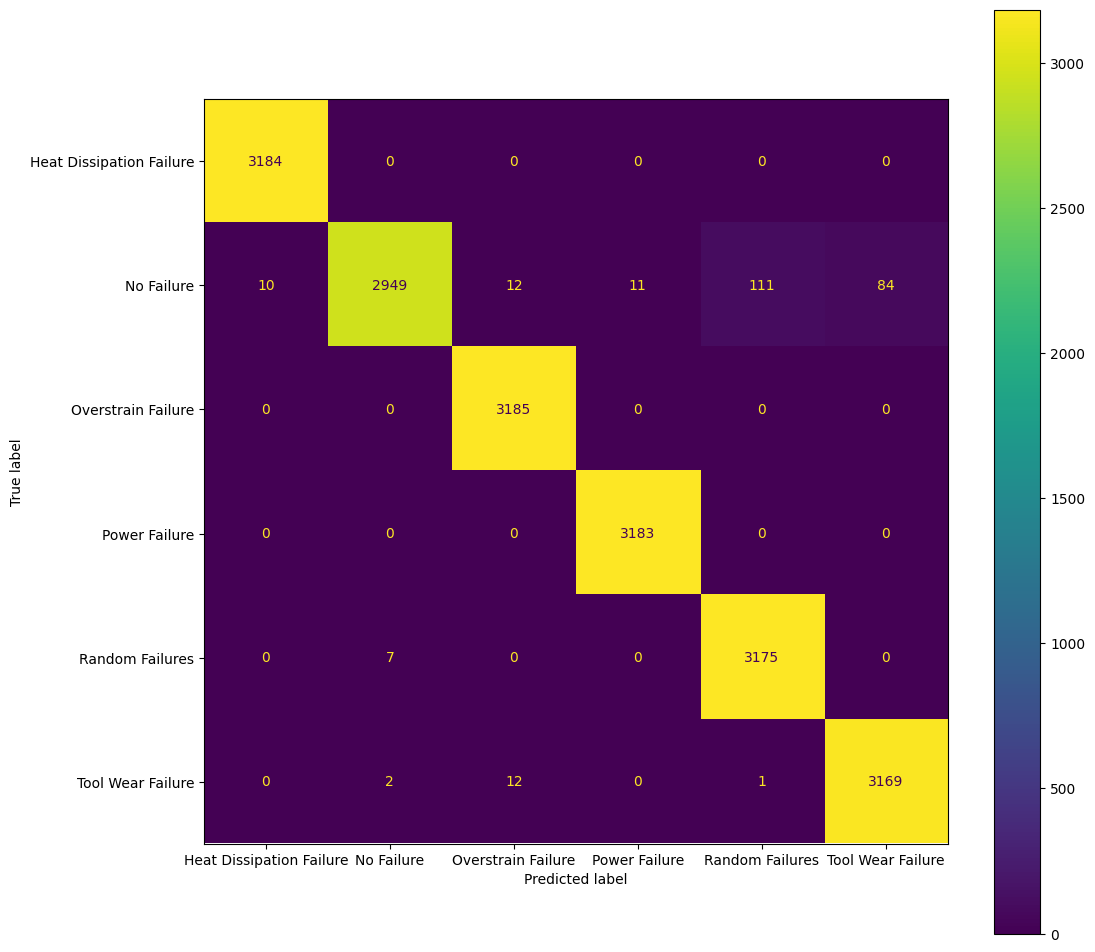

In [ ]:
#plot the confusion matrix
fig , ax = plt.subplots(figsize =(12,12))
print(classification_report(y_test , y_pred_rfc))
#create the matrix
cm = confusion_matrix(y_test,y_pred_lgbm)
cmp = ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = pipeline.classes_)
cmp.plot(ax = ax)
plt.show()

In [ ]:
print("Accuracy Score : %.4f" %(accuracy_score(y_test,y_pred_lgbm)))
print("Matthews correlation coefficient : %.4f" %(matthews_corrcoef(y_test,y_pred_lgbm)))

Accuracy Score : 0.9869
Matthews correlation coefficient : 0.9844


XGBClassifier

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb = OutputCodeClassifier(XGBClassifier(),code_size=6,random_state=42)

In [ ]:
#Final pipeline combined with RandomForest
pipeline_xgb = Pipeline(
    steps =[
        ("preprocess",full),
        ("base",xgb),])

In [ ]:
model_xgb = pipeline_xgb.fit(x_train,y_train)
y_pred_xgb = model_xgb.predict(x_test)

                          precision    recall  f1-score   support

Heat Dissipation Failure       1.00      1.00      1.00      3184
              No Failure       1.00      0.96      0.98      3177
      Overstrain Failure       0.99      1.00      1.00      3185
           Power Failure       1.00      1.00      1.00      3183
         Random Failures       0.98      1.00      0.99      3182
       Tool Wear Failure       0.98      1.00      0.99      3184

                accuracy                           0.99     19095
               macro avg       0.99      0.99      0.99     19095
            weighted avg       0.99      0.99      0.99     19095



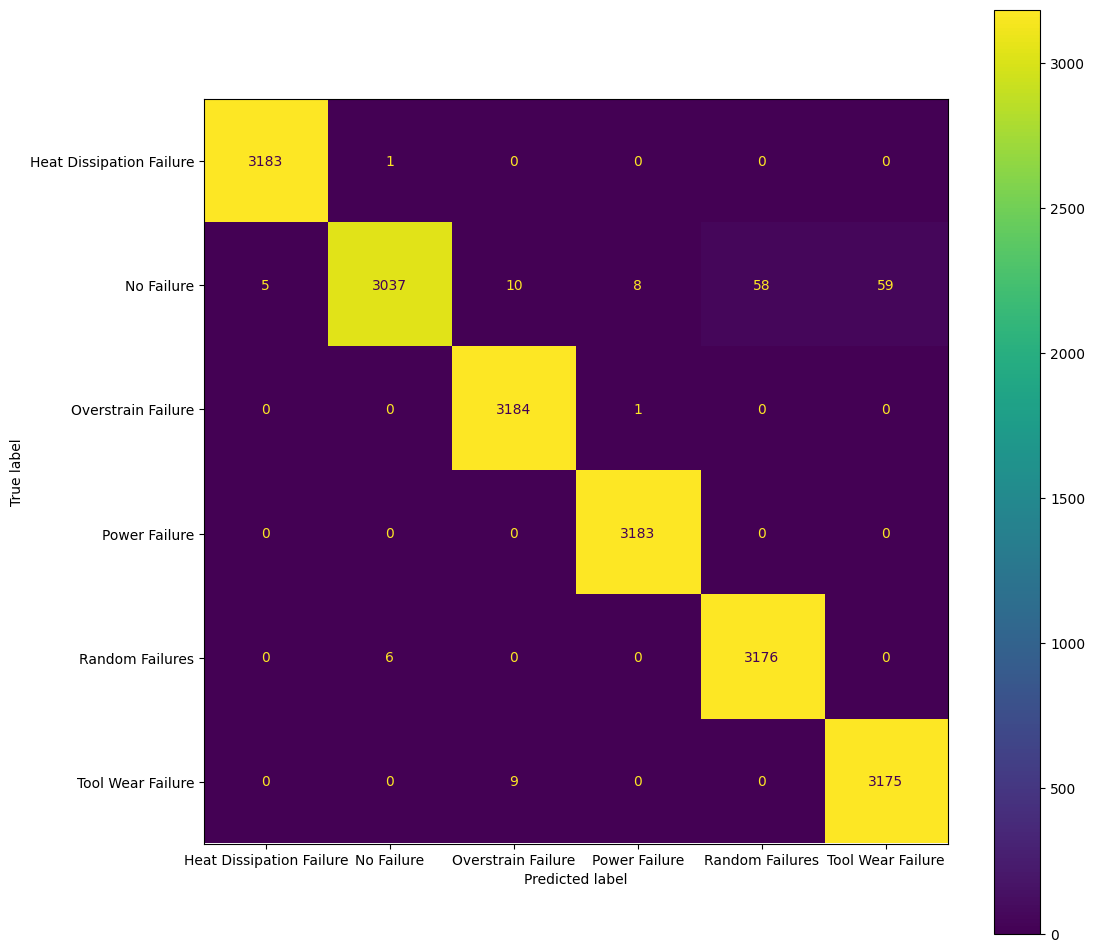

In [ ]:
#plot the confusion matrix
fig , ax = plt.subplots(figsize =(12,12))
print(classification_report(y_test , y_pred_xgb))
#create the matrix
cm = confusion_matrix(y_test,y_pred_xgb)
cmp = ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = pipeline.classes_)
cmp.plot(ax = ax)
plt.show()

In [ ]:
print("Accuracy Score : %.4f" %(accuracy_score(y_test,y_pred_xgb)))
print("Matthews correlation coefficient : %.4f" %(matthews_corrcoef(y_test,y_pred_xgb)))

Accuracy Score : 0.9918
Matthews correlation coefficient : 0.9902


In [ ]:
!pip install catboost

CatBoostClassifier

In [ ]:
from catboost import CatBoostClassifier

In [ ]:
catb = OutputCodeClassifier(CatBoostClassifier(random_seed =42 ,logging_level='Silent'),code_size=6,random_state=42)

In [ ]:
pipeline_catb = Pipeline(
    steps =[
        ("preprocess",full),
        ("base",catb),])

In [ ]:
model_catb = pipeline_catb.fit(x1_res,y1_res)
y_pred_catb = model_catb.predict(x_test)

In [ ]:
print("Accuracy Score : %.4f" %(accuracy_score(y_test,y_pred_catb)))
print("Matthews correlation coefficient : %.4f" %(matthews_corrcoef(y_test,y_pred_catb)))

Accuracy Score : 0.9976
Matthews correlation coefficient : 0.9972


In [ ]:
from sklearn.multiclass import OneVsRestClassifier ,OneVsOneClassifier
catb_ov = CatBoostClassifier()
ovr = OneVsRestClassifier(catb_ov)

In [ ]:
ovr.fit(x1_res,y1_res)
yhat_ovr = ovr.predict(catb_ov)

In [ ]:
#Final pipeline combined with RandomForest
pipeline_ovr = Pipeline(
    steps =[
        ("preprocess",full),
        ("base",ovr),])

#plot the confusion matrix
fig , ax = plt.subplots(figsize =(12,12))
print(classification_report(y_test , yhat_ovr))
#create the matrix
cm = confusion_matrix(y_test,yhat_ovr)
cmp = ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = pipeline.classes_)
cmp.plot(ax = ax)
plt.show()

In [ ]:
print("Balanced Accuracy Score : %.4f" %(balanced_accuracy_score(y_test,yhat_ovr)))
print("Accuracy Score : %.4f" %(accuracy_score(y_test,yhat_ovr)))
print("Matthews correlation coefficient : %.4f" %(matthews_corrcoef(y_test,yhat_ovr)))

In [ ]:
catb_ovo = CatBoostClassifier()
ovo = OneVsOneClassifier(catb_ovo)

In [ ]:
ovo.fit(x1_res,y1_res)
yhat_ovo = ovo.predict(catb_ovo)

In [ ]:
# plot the confusion matrix
catb_ovo = plt.subplots(figsize =(12, 12))
# Create the matrix
cm = confusion_matrix(y_test,yhat_ovr)
cmp = ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = pipeline.classes_)
cmp.plot()
plt.show()
print(classification_report(y_test ,yhat_ovo))

In [ ]:
print("Balanced Accuracy Score: %.4f" %(balanced_accuracy_score(y_test,yhat_ovo)))
print("Accuracy Score : %.4f" %(accuracy_score(y_test,yhat_ovo)))
print("Matthews correlation coefficient : %.4f" %(matthews_corrcoef(y_test,yhat_ovo)))

In [ ]:
rfc_ov = RandomForestClassifier()

In [ ]:
ovr = OneVsRestClassifier(rfc_ov)
ovr.fit(x1_res,y1_res)

OneVsRestClassifier(estimator=RandomForestClassifier())

In [ ]:
yhat_ovr = ovr.predict(x_test)

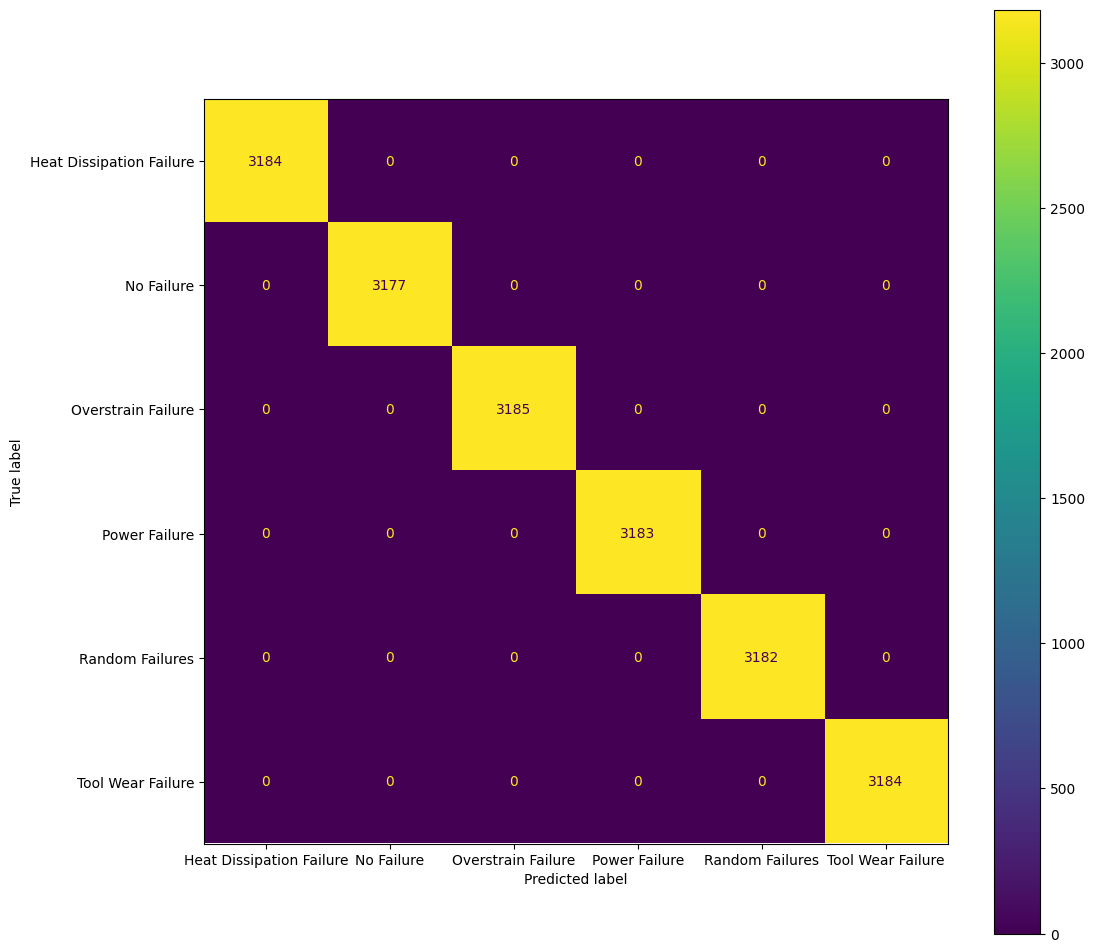

                          precision    recall  f1-score   support

Heat Dissipation Failure       1.00      1.00      1.00      3184
              No Failure       1.00      1.00      1.00      3177
      Overstrain Failure       1.00      1.00      1.00      3185
           Power Failure       1.00      1.00      1.00      3183
         Random Failures       1.00      1.00      1.00      3182
       Tool Wear Failure       1.00      1.00      1.00      3184

                accuracy                           1.00     19095
               macro avg       1.00      1.00      1.00     19095
            weighted avg       1.00      1.00      1.00     19095



In [ ]:
# plot the confusion matrix
fig , ax = plt.subplots(figsize =(12, 12))
# Create the matrix
cm = confusion_matrix(y_test,yhat_ovr)
cmp = ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = pipeline.classes_)
cmp.plot(ax = ax)
plt.show()
print(classification_report(y_test ,yhat_ovr))

In [ ]:
print("Balanced Accuracy Score: %.4f" %(balanced_accuracy_score(y_test,yhat_ovr)))
print("Accuracy Score : %.4f" %(accuracy_score(y_test,yhat_ovr)))
print("Matthews correlation coefficient : %.4f" %(matthews_corrcoef(y_test,yhat_ovr)))

Balanced Accuracy Score: 1.0000
Accuracy Score : 1.0000
Matthews correlation coefficient : 1.0000


In [ ]:
ovo = OneVsOneClassifier(rfc_ov)

In [ ]:
ovo.fit(x1_res,y1_res)
yhat_ovo = ovo.predict(x_test)

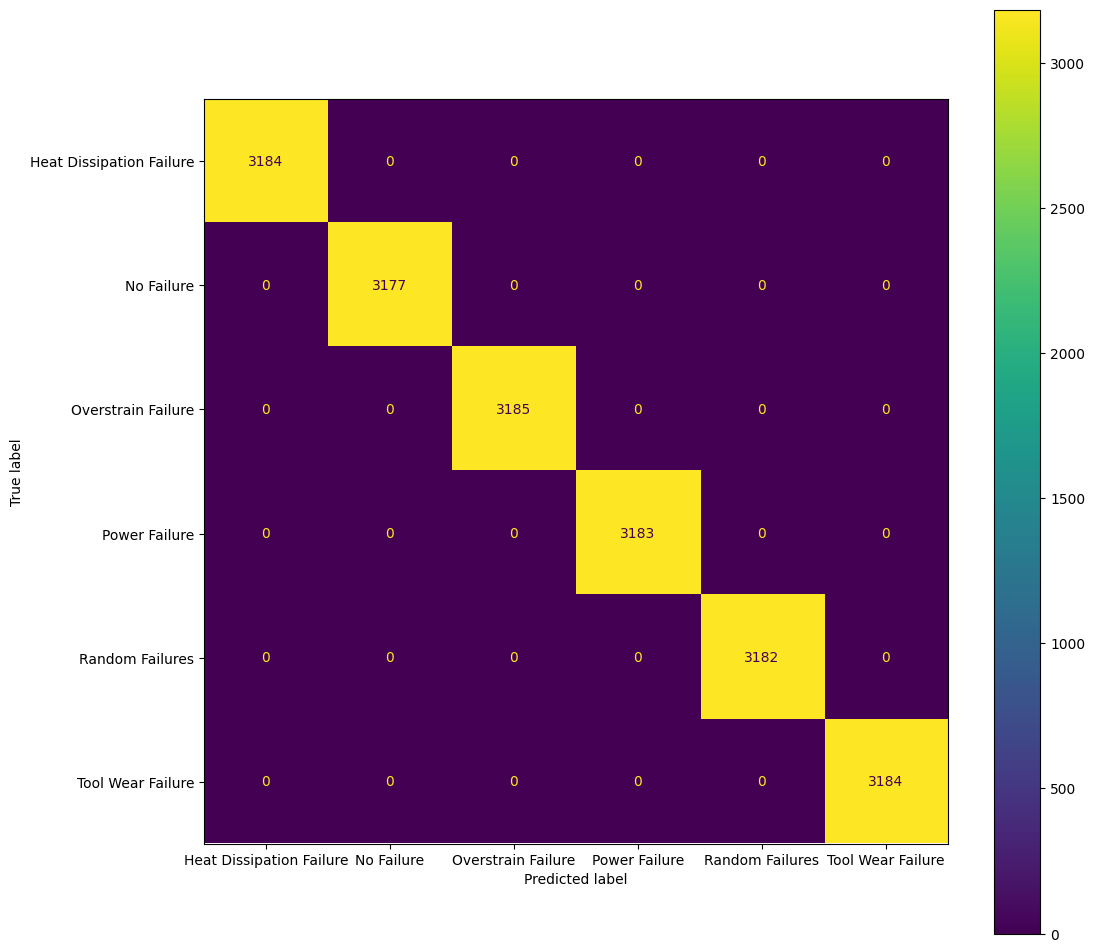

                          precision    recall  f1-score   support

Heat Dissipation Failure       1.00      1.00      1.00      3184
              No Failure       1.00      1.00      1.00      3177
      Overstrain Failure       1.00      1.00      1.00      3185
           Power Failure       1.00      1.00      1.00      3183
         Random Failures       1.00      1.00      1.00      3182
       Tool Wear Failure       1.00      1.00      1.00      3184

                accuracy                           1.00     19095
               macro avg       1.00      1.00      1.00     19095
            weighted avg       1.00      1.00      1.00     19095



In [ ]:
# plot the confusion matrix
fig , ax = plt.subplots(figsize =(12, 12))
# Create the matrix
cm = confusion_matrix(y_test,yhat_ovo)
cmp = ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = pipeline.classes_)
cmp.plot(ax = ax)
plt.show()
print(classification_report(y_test ,yhat_ovo))

In [ ]:
print("Balanced Accuracy Score: %.4f" %(balanced_accuracy_score(y_test,yhat_ovo)))
print("Accuracy Score : %.4f" %(accuracy_score(y_test,yhat_ovo)))
print("Matthews correlation coefficient : %.4f" %(matthews_corrcoef(y_test,yhat_ovo)))

Balanced Accuracy Score: 1.0000
Accuracy Score : 1.0000
Matthews correlation coefficient : 1.0000
